<a href="https://colab.research.google.com/github/srilamaiti/SM_MIDS_W266_HW/blob/main/assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 6: Lighting Estimation

MIDS W281: Computer Vision

## Recommended Libraries

In [1]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

![Hybrid Teaser](https://raw.githubusercontent.com/W281/fileRepository/main/Assignments/Assignment_6/sphere.png)

 ### Overview
Lighting estimation is critical for many computer vision applications, and demonstrates a common use of least squares operations on pixel values. Accurate estimation of the lighting environment under which an image was captured can be used for image forensics, image re-lighting, 3D surface modeling, and compositing images with rendered objects, and many other techniques. For this assignment we will compute the lighting direction for a simple toy problem consisting of a sphere with faceted edges.

Consider the illuminated sphere shown above. If, as in this case, the light illuminating the sphere is distant and the sphere is a Lambertian surface, the amount of light $I$ that strikes any point ($X,Y,Z$) on the sphere's surface is equal to the dot product between the 3-D surface normal $N$ at ($X,Y,Z$) and the single 3-D vector $L$ which specifies the direction to the light source. In this assignment, you will estimate the direction to the light $L$ using least squares. You can assume that there is only one light source in the scene and there is no ambient light.

### Description

1. Write a Python code to load the given 3-D [$X$-](X.npy), [$Y$-](Y.npy), and [$Z$-](Z.npy) coordinates of the sphere and the corresponding illumination [$I$](I.npy). After loading the files you will have four 41 x 41 matrices corresponding to the illumination $I$ and the $X$-, $Y$-, and $Z$- coordinates of the sphere. That is, for any $u$ and $v$ between 1 and 41, the illumination on the sphere's surface at ($X_{u,v},Y_{u,v},Z_{u,v}$) is $I_{u,v}$. Display this sphere using the `plot_surface` method in Python. Set the color values so that the displayed sphere looks like the above image without the $L$ and $N$ arrows.  
&nbsp;

2. For each ($X,Y,Z$) on the sphere's surface, determine the surface normal $N$. The surface normal at any point on the sphere is a vector from the sphere origin to the point. Since the sphere is centered at the origin, this is a simple calculation. The surface normal should be specified as a unit vector.  
&nbsp;  

3. Using least-squares, estimate the lighting (a 3-D vector). Your solution should create an over constrained system of linear equations in the surface normal and illumination at each point ($X,Y,Z$) on the sphere's surface that is not in shadow (i.e. intensity is greater than zero). Your solution for the light vector $L$ is determined by solving this system of linear equations using least-squares.   
&nbsp;

**Do not use `numpy.linalg.pinv`.**

### Deliverables:

- Python code for computing the sphere normals and the light direction
- A plot displaying the 3-D sphere
- The 3-D direction of the light source

#### Create your functions

In [2]:
def plot_save_sphere(X,Y,Z,C,out_file):
    # write a function that takes the 
    # X,Y,Z and I NumPy array files as arguments,
    # plots the sphere,
    # then saves the figure to the out_file

    fig = plt.figure(figsize =(8, 8)) 
    ax = plt.axes(projection ='3d') 
    ax.set_box_aspect([1, 1, 1])
    ax.plot_surface(X, Y, Z, cmap='gray', facecolors=C)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('X', fontsize=10)
    ax.set_ylabel('Y', fontsize=10)
    ax.set_zlabel('Z', fontsize=10)
    
    # display the sphere
    # Plot and save the deliverable 
    plt.title('Plot the Sphere')
    plt.tight_layout(pad=5.08, h_pad=None, w_pad=None, rect=None)
    plt.savefig(out_file, bbox_inches='tight')
    plt.show()

In [20]:
np.sqrt(16)

4.0

In [21]:
def compute_normals(X,Y,Z):
    
    N = np.zeros((41*41, 3)) # your code should fill in the values for sphere normals
    
    # write a function that takes the 
    # X,Y,Z array files as arguments,
    # each input is of size (41, 41)
    # output N of size (41*41, 3)
    
    # TODO: vectorize the inputs to (41*41, 1)
    x_v, y_v, z_v = X.flatten(), Y.flatten(), Z.flatten()
    l2_normal = np.sqrt(np.square(x_v) + np.square(y_v) + np.square(z_v))
    return np.array([normal / l2_normal_val for normal, l2_normal_val in zip(zip(x_v, y_v, z_v), l2_normal)])
    
    # TODO compute the normal at each point on the sphere
    
    # TODO calculate the 2-norm of each normal

    # TODO divide each Normal by its norm
    
    return N

#### Run your code

In [3]:
# load the npy and plot the sphere
X = np.load('X.npy')
Y = np.load('Y.npy')
Z = np.load('Z.npy')
I = np.load('I.npy')

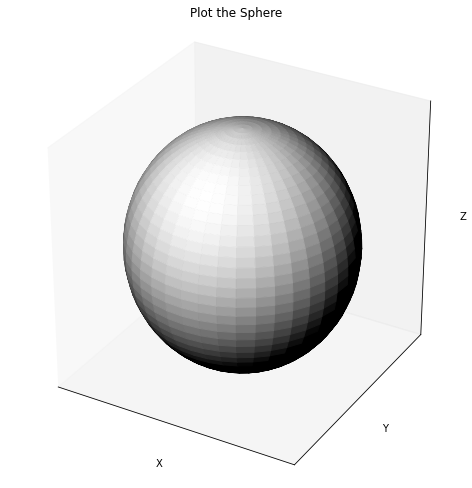

In [4]:
# plot the sphere
plot_save_sphere(X,
                 Y,
                 Z, 
                 np.concatenate((I[:,:,np.newaxis],
                                 I[:,:,np.newaxis],
                                 I[:,:,np.newaxis]
                                ), 
                                axis=2
                                ), 
                 'temp.png'
                )

In [31]:
N = compute_normals(X,Y,Z)
N_transpose = N.T
print(N.shape, N_transpose.shape)
N

(1681, 3) (3, 1681)


array([[ 0.01513907,  0.        , -0.9998854 ],
       [ 0.01513907,  0.        , -0.9998854 ],
       [ 0.01513907,  0.        , -0.9998854 ],
       ...,
       [ 0.01513907,  0.        ,  0.9998854 ],
       [ 0.01513907,  0.        ,  0.9998854 ],
       [ 0.01513907,  0.        ,  0.9998854 ]])

#### Calculate and print the 3D direction of light source

In [29]:
I_v = I.flatten() # Vectorizing I
idxs = np.where(I_v > 0) # Getting only the illuminated points
N_x, N_y, N_z, I_v = N_t[0][idxs], N_t[1][idxs], N_t[2][idxs], I_v[idxs] # Subsetting only on illuminated points

M = np.vstack((N_x, N_y, N_z, np.ones(len(N_x)))).T
l = np.linalg.inv((M.T @ M)) @ M.T @ I_v
print(l.shape)
print(l)

(4,)
[ 5.96750974e-03 -7.07039366e-01  7.07022894e-01  2.88278895e-05]


In [ ]:
# TODO calculate light direction using least squares
# vectorize I 
i_v = I.flatten()

# consider only those points which are not in shadow
# that is pixel value is greater than 0
illuminated_idx = np.where(I_v > 0) 

# solve for the light direction using least squares, remember I = N . l where l is the light direction

# print the light direction

#print(l)

NameError: ignored